# Kernel Methoden

In dieser Übung werden wir und verschiedene Kernel Methoden ansehen und diese vergleichen.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



Wir verwenden das *Red Wine Quality* Datenset und wollen ein Modell trainieren, welches die Qualität des Weines anhand verschiedener Parameter vorhersagen kann. Zuerst laden wir das Datenset als *pandas DataFrame*:

In [2]:

df = pd.read_csv("./data/winequality-red.csv")
data_train, data_test = train_test_split(df.copy(), test_size=0.2, random_state=42)
data_train.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5


Die Qualität ist ein Integer Wert zwischen 3 und 8. Wir können sowohl Klassifikations- als auch Regressionsmodelle verwenden, da es eine Skala ist.

In [3]:
print("Min Quality:", df.quality.min())
print("Max Quality:", df.quality.max())

Min Quality: 3
Max Quality: 8


Wir können die Verteilung der Qualität in einem Histogram plotten und sehen, dass ein Großteil der Weine eine Qualität $\leq 6$ besitzen.


<AxesSubplot:>

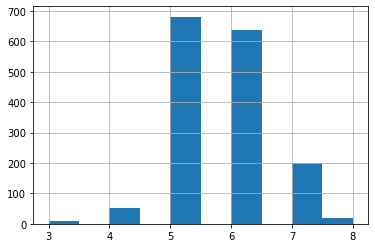

In [4]:
df.quality.hist()

## 1a) Kernel Methoden Vergleich

Der folgende Code verwendet eine *Kernel Ridge Regression* um die Qualität vorherzusagen. 


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer

X_train, y_train = data_train.drop(["quality"], axis=1), data_train.quality
X_test, y_test = data_test.drop(["quality"], axis=1), data_test.quality

# In sklearn ist ein höherer Score immer besser. der mean_absolute_error ist aber am besten, wenn er klein ist.
# Wenn wir den Scorer erstellen nehmen wir also -mean_absoute_error als Bewertungsmaß. Dazu setzten wir greater_is_better=False.
# Dementsprechend werden die Scores im Grid Search auch negativ sein und der Score, der am nähesten zu 0 ist der beste.
score = make_scorer(mean_absolute_error, greater_is_better=False)  

# make_scorer erstellt im Prinzip die folgende Funktion
# def score(model, X_true, y_true)
#     y_pred = model.predict(X_true)
#     return - mean_absolute_error(y_true, y_pred)

pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("ridge", KernelRidge(kernel="rbf"))
])

model = GridSearchCV(pipeline, [{"ridge__alpha": [0.001, 0.01, 0.1, 1], "ridge__gamma": [0.001, 0.01, 0.03, 0.05, 0.1], "ridge__kernel": ["rbf"]}], 
                     n_jobs=-1, scoring=score, cv = 5)
model.fit(X_train, y_train)
pd.DataFrame(model.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,param_ridge__gamma,param_ridge__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.212939,0.019284,0.023560,0.008332,0.1,0.03,rbf,"{'ridge__alpha': 0.1, 'ridge__gamma': 0.03, 'r...",-0.515715,-0.505117,-0.510790,-0.503668,-0.434165,-0.493891,0.030168,1
7,0.222526,0.023835,0.024230,0.008792,0.01,0.03,rbf,"{'ridge__alpha': 0.01, 'ridge__gamma': 0.03, '...",-0.516464,-0.500341,-0.519668,-0.494614,-0.442176,-0.494653,0.027884,2
6,0.249819,0.027304,0.019349,0.005511,0.01,0.01,rbf,"{'ridge__alpha': 0.01, 'ridge__gamma': 0.01, '...",-0.519175,-0.504156,-0.513455,-0.499787,-0.437317,-0.494778,0.029526,3
11,0.223420,0.019638,0.020093,0.006629,0.1,0.01,rbf,"{'ridge__alpha': 0.1, 'ridge__gamma': 0.01, 'r...",-0.519601,-0.511059,-0.516975,-0.499819,-0.444676,-0.498426,0.027724,4
1,0.271914,0.036496,0.021593,0.004648,0.001,0.01,rbf,"{'ridge__alpha': 0.001, 'ridge__gamma': 0.01, ...",-0.527497,-0.509201,-0.512698,-0.497677,-0.446754,-0.498765,0.027694,5


- Trainiere eine *Support Vektor Regression* und einen *Support Vektor Klassifikator* mit einem *`rbf` Kernel*. Benutze einen StandardScaler als Vorbereitungsschritt und wähle die Hyperparameter mit `GridSearchCV`. Wir wollen das Modell anhand der *Mean Absolute Errors* bewerten. Setzte dazu `scoring=score` in `GridSearchCV`. Welches Modell ist das beste?

---
Um den Grid Search schneller zu machen, kannst du `n_jobs=-1` setzen. Dadurch werden die verschiedenen Modelle und Splits auf unterschiedliche Prozesse verteilt und parallel ausgeführt.

---


In [6]:
from sklearn.svm import SVR, SVC
import numpy as np


rbf_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
 ])



In [7]:
points = np.exp(np.linspace(-10,5,5))
points2 = 2**np.linspace(-5,15,5)

In [8]:
np.round(points2)

array([0.0000e+00, 1.0000e+00, 3.2000e+01, 1.0240e+03, 3.2768e+04])

In [9]:
#grid_search
from sklearn.model_selection import GridSearchCV

In [10]:
grid_search = GridSearchCV(rbf_kernel_svm_clf, {"svm_clf__gamma": points,
                                         "svm_clf__C": points}, cv=5,scoring=score,n_jobs=1)

In [11]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm_clf', SVC(C=0.001, gamma=5))]),
             n_jobs=1,
             param_grid={'svm_clf__C': array([4.53999298e-05, 1.93045414e-03, 8.20849986e-02, 3.49034296e+00,
       1.48413159e+02]),
                         'svm_clf__gamma': array([4.53999298e-05, 1.93045414e-03, 8.20849986e-02, 3.49034296e+00,
       1.48413159e+02])},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [12]:
pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm_clf__C,param_svm_clf__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.070807,0.007407,0.038320,0.006105,3.490343,0.082085,"{'svm_clf__C': 3.4903429574618414, 'svm_clf__g...",-0.437500,-0.417969,-0.472656,-0.402344,-0.352941,-0.416682,0.039589,1
21,0.092090,0.007979,0.034169,0.007330,148.413159,0.00193,"{'svm_clf__C': 148.4131591025766, 'svm_clf__ga...",-0.468750,-0.453125,-0.476562,-0.453125,-0.372549,-0.444822,0.037259,2
22,0.180393,0.006850,0.026526,0.007921,148.413159,0.082085,"{'svm_clf__C': 148.4131591025766, 'svm_clf__ga...",-0.476562,-0.453125,-0.492188,-0.464844,-0.388235,-0.454991,0.035793,3
12,0.093714,0.007741,0.039782,0.007329,0.082085,0.082085,"{'svm_clf__C': 0.0820849986238988, 'svm_clf__g...",-0.507812,-0.476562,-0.460938,-0.449219,-0.384314,-0.455769,0.040783,4
16,0.084017,0.010399,0.026053,0.007807,3.490343,0.00193,"{'svm_clf__C': 3.4903429574618414, 'svm_clf__g...",-0.500000,-0.488281,-0.476562,-0.449219,-0.376471,-0.458107,0.044158,5


In [13]:
grid_search.best_params_
#weitere gridsearch

{'svm_clf__C': 3.4903429574618414, 'svm_clf__gamma': 0.0820849986238988}

In [14]:
#{'svm_clf__C': 3.4903429574618414, 'svm_clf__gamma': 0.0820849986238988}

In [15]:
# . So γ acts like a regularization
# hyperparameter: if overfitting, you should reduce it, and if it is under‐
# fitting, you should increase it (similar to the C hyperparameter).

In [16]:
np.log(0.08)

-2.5257286443082556

In [17]:
np.log(3.4903429574618414)

1.25

In [18]:
points = np.exp(np.linspace(2/3,2,5))
points2 = np.exp(np.linspace(-3,-2,5))

In [19]:
grid_search = GridSearchCV(rbf_kernel_svm_clf, {"svm_clf__gamma": points,
                                         "svm_clf__C": points}, cv=5,scoring=score,n_jobs=1)

In [20]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm_clf', SVC(C=0.001, gamma=5))]),
             n_jobs=1,
             param_grid={'svm_clf__C': array([1.94773404, 2.71828183, 3.79366789, 5.29449005, 7.3890561 ]),
                         'svm_clf__gamma': array([1.94773404, 2.71828183, 3.79366789, 5.29449005, 7.3890561 ])},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [21]:
pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm_clf__C,param_svm_clf__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,0.201129,0.011042,0.037716,0.005957,7.389056,1.947734,"{'svm_clf__C': 7.38905609893065, 'svm_clf__gam...",-0.472656,-0.472656,-0.441406,-0.429688,-0.411765,-0.445634,0.023999,1
15,0.187114,0.006369,0.042819,0.008359,5.29449,1.947734,"{'svm_clf__C': 5.294490050470029, 'svm_clf__ga...",-0.472656,-0.472656,-0.441406,-0.429688,-0.411765,-0.445634,0.023999,1
10,0.186665,0.006570,0.033262,0.000349,3.793668,1.947734,"{'svm_clf__C': 3.7936678946831783, 'svm_clf__g...",-0.472656,-0.468750,-0.441406,-0.433594,-0.415686,-0.446419,0.021546,3
0,0.202794,0.005079,0.039216,0.002365,1.947734,1.947734,"{'svm_clf__C': 1.9477340410546757, 'svm_clf__g...",-0.472656,-0.472656,-0.445312,-0.433594,-0.411765,-0.447197,0.023411,4
5,0.185836,0.007567,0.033084,0.000474,2.718282,1.947734,"{'svm_clf__C': 2.718281828459045, 'svm_clf__ga...",-0.472656,-0.472656,-0.449219,-0.433594,-0.415686,-0.448762,0.022209,5


In [22]:
grid_search.best_params_

{'svm_clf__C': 5.294490050470029, 'svm_clf__gamma': 1.9477340410546757}

In [23]:
# SVC

In [24]:
SVR

sklearn.svm._classes.SVR

In [25]:
np.round(np. logspace ( -3 , 3 , 10))

array([   0.,    0.,    0.,    0.,    0.,    2.,   10.,   46.,  215.,
       1000.])

In [26]:


rbf_kernel_svr = Pipeline([
 ("scaler", StandardScaler()),
 ("svr", SVR(kernel="rbf", epsilon=5, C=0.001))
 ])



In [27]:
points = np.exp(np.linspace(-10,5,5))
points2 = 2**np.linspace(-5,15,5)

In [28]:
grid_search = GridSearchCV(rbf_kernel_svr, {"svr__C": np. logspace ( -3 , 3 , 10),
                                         "svr__epsilon": [1e-4 , 1e-3 , 1e-2 , 1e-1 , 1e0 , 1e1]}, cv=5,scoring=score,n_jobs=1)

In [29]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR(C=0.001, epsilon=5))]),
             n_jobs=1,
             param_grid={'svr__C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'svr__epsilon': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [30]:
pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svr__C,param_svr__epsilon,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
32,0.107179,0.008019,0.032511,0.008674,2.154435,0.01,"{'svr__C': 2.154434690031882, 'svr__epsilon': ...",-0.488754,-0.443100,-0.498647,-0.460816,-0.392922,-0.456848,0.037567,1
31,0.104713,0.006554,0.037751,0.006102,2.154435,0.001,"{'svr__C': 2.154434690031882, 'svr__epsilon': ...",-0.489566,-0.443021,-0.499327,-0.460434,-0.393568,-0.457183,0.037637,2
30,0.112633,0.008373,0.034058,0.008307,2.154435,0.0001,"{'svr__C': 2.154434690031882, 'svr__epsilon': ...",-0.489608,-0.443048,-0.499415,-0.460462,-0.393617,-0.457230,0.037646,3
33,0.092780,0.007812,0.026495,0.009428,2.154435,0.1,"{'svr__C': 2.154434690031882, 'svr__epsilon': ...",-0.493462,-0.460767,-0.498876,-0.468568,-0.403555,-0.465046,0.033952,4
36,0.231575,0.007956,0.036442,0.006737,10.0,0.0001,"{'svr__C': 10.0, 'svr__epsilon': 0.0001}",-0.512040,-0.436169,-0.519302,-0.463204,-0.418835,-0.469910,0.040016,5


In [31]:
grid_search.best_params_

{'svr__C': 2.154434690031882, 'svr__epsilon': 0.01}

In [32]:
svm_grid = {'C': 5.294490050470029, 'gamma': 1.9477340410546757}
svr_grid = {'C': 2.154434690031882, 'epsilon': 0.01}

In [33]:
kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="rbf", gamma=svm_grid["gamma"], C=svm_grid["C"]))
 ])
kernel_svm_clf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=5.294490050470029, gamma=1.9477340410546757))])

In [34]:
kernel_svr = Pipeline([
 ("scaler", StandardScaler()),
 ("svr", SVR(kernel="rbf", epsilon=svr_grid["epsilon"], C=svr_grid["C"]))
 ])
kernel_svr.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', SVR(C=2.154434690031882, epsilon=0.01))])

In [35]:
svm_pred = kernel_svm_clf.predict(X_test)


In [36]:
svr_pred = kernel_svr.predict(X_test)

In [37]:
grid_search.best_score_

-0.4568477350926251

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,svm_pred)


0.578125

In [39]:
mean_squared_error(y_test,svr_pred)


0.3612197010162641

- Welchen Fehler (*Mean Absolute Error*) erzielt das beste Modell auf der Testmenge?

In [40]:
{'svm_clf__C': 5.294490050470029, 'svm_clf__gamma': 1.9477340410546757}

{'svm_clf__C': 5.294490050470029, 'svm_clf__gamma': 1.9477340410546757}

## 1b) Binäre Support Vektor Klassifikation
Ein Gourmet-Restaurant will Wein einkaufen und möglichst keinen Wein mit schlechter Qualität in der Karte haben. Dazu will es das *Red Wine Quality* Datenset verwenden um einen Klassifikator zu trainieren, welcher guten Wein von schlechten unterscheiden kann. Guter Wein mit einer Qualität $\gt 6$ bekommt das Label $1$ und schlechter Wein mit Qualität $\leq 6$ bekommt das Label $0$. Für das Restaurant ist ein hoher *Precision Score* sehr wichtig. Das bedeutet, wenn der Klassifikator einen Wein als gut einstuft, dann soll dieser Wein mit hoher "Wahrscheinlichkeit" tatsächlich gut sein. Der *Recall Score*, die "Wahrscheinlichkeit", dass ein guter Wein als gut erkannt wird, ist eher nebensächlich. Mit anderen Worten, das Restaurant kann es eher verkraften einen guten Wein nicht anzubieten, als dass es dem Kunden einen schlechten Wein serviert.


Der folgende Code erstellt dieses neue *Target*. Beachte, dass die Bezeichung jetzt `X_train_clf` und `y_train_clf` ist.

In [41]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, make_scorer

df_clf = df.copy()

df_clf["goodquality"] = (df_clf.quality > 6).astype(int)
df_clf = df_clf.drop("quality", axis=1)
data_train_clf, data_test_clf = train_test_split(df_clf, test_size=0.2, random_state=43, stratify=df_clf.goodquality)


X_train_clf, y_train_clf = data_train_clf.drop(["goodquality"], axis=1), data_train_clf.goodquality
X_test_clf, y_test_clf = data_test_clf.drop(["goodquality"], axis=1), data_test_clf.goodquality

Wir können sehen, dass das Datenset jetzt sehr unausgewogen ist und die positive Klasse eher selten ist.

In [42]:
y_train_clf.value_counts()

0    1105
1     174
Name: goodquality, dtype: int64

- Trainiere ein `SVC` Modell. Benutze wieder `StandardScaler`, `GridSearchCV` und `StratifiedKFold` (setze dazu `cv=StratifiedKFold()` in `GridSearchCV`).  Benutze den `f1_score` und setzte `probability=True` damit die `SVC` Wahrscheinlichkeiten berechnen kann.

In [43]:
scorer = make_scorer(f1_score)


In [44]:

svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly",probability=True))
 ])




In [45]:
10**np.linspace(-5,2,7)

array([1.00000000e-05, 1.46779927e-04, 2.15443469e-03, 3.16227766e-02,
       4.64158883e-01, 6.81292069e+00, 1.00000000e+02])

In [46]:

grid_search_svm = GridSearchCV(svm_clf,{
    "svm_clf__C" : np.logspace(-3,4,7),
    "svm_clf__gamma" : 10**np.linspace(-5,2,7),
    "svm_clf__kernel" : ["rbf","poly"] },cv=StratifiedKFold(2)
)

In [47]:
grid_search_svm.fit(X_train_clf,y_train_clf)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm_clf',
                                        SVC(kernel='poly', probability=True))]),
             param_grid={'svm_clf__C': array([1.00000000e-03, 1.46779927e-02, 2.15443469e-01, 3.16227766e+00,
       4.64158883e+01, 6.81292069e+02, 1.00000000e+04]),
                         'svm_clf__gamma': array([1.00000000e-05, 1.46779927e-04, 2.15443469e-03, 3.16227766e-02,
       4.64158883e-01, 6.81292069e+00, 1.00000000e+02]),
                         'svm_clf__kernel': ['rbf', 'poly']})

In [48]:
pd.DataFrame(grid_search_svm.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm_clf__C,param_svm_clf__gamma,param_svm_clf__kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
50,0.136704,0.003570,0.037999,0.011607,3.162278,0.464159,rbf,"{'svm_clf__C': 3.1622776601683795, 'svm_clf__g...",0.889062,0.901408,0.895235,0.006173,1
74,0.092340,0.005213,0.016847,0.002557,681.292069,0.002154,rbf,"{'svm_clf__C': 681.2920690579622, 'svm_clf__ga...",0.896875,0.888889,0.892882,0.003993,2
63,0.035650,0.005644,0.014396,0.002308,46.415888,0.031623,poly,"{'svm_clf__C': 46.41588833612782, 'svm_clf__ga...",0.898438,0.882629,0.890533,0.007904,3
23,0.058762,0.013475,0.000000,0.000000,0.014678,0.464159,poly,"{'svm_clf__C': 0.014677992676220698, 'svm_clf_...",0.898438,0.882629,0.890533,0.007904,3
94,0.145862,0.004236,0.055217,0.001838,10000.0,6.812921,rbf,"{'svm_clf__C': 10000.0, 'svm_clf__gamma': 6.81...",0.887500,0.888889,0.888194,0.000694,5


In [56]:
parameters = grid_search_svm.best_params_

In [69]:
def f(*args):
    return args

In [81]:
parameter_ = [parameters[k] for k in f(*parameters)]

In [77]:
# pd.DataFrame(grid_search_svm.cv_results_).sort_values("rank_test_score").iloc[1]

In [82]:
f(*parameters)

('svm_clf__C', 'svm_clf__gamma', 'svm_clf__kernel')

In [100]:
#verwende grid_search_svm.best_estimator_


In [85]:
svm_opt = svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(C = parameter_[0],gamma = parameter_[1],kernel = parameter_[2]))
 ])

In [86]:
svm_opt.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=3.1622776601683795, gamma=0.4641588833612782))])

In [ ]:
X_test_clf, y_test_clf

- Berechne die Wahrheitsmatrix des Trainingssets und des besten Modells. Benutze dazu `cross_val_predict`, benutze wieder `cv=StratifiedKFold()`.
- Berechne *Recall* und *Precision Score* anhand des Trainingssets.

In [91]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score, precision_score

y_train_pred = cross_val_predict(svm_opt, X_train_clf, y_train_clf,cv=StratifiedKFold(2))
confusion_matrix(y_train_clf, y_train_pred)


array([[1063,   42],
       [  92,   82]], dtype=int64)

In [94]:
svm_opt[1]

SVC(C=3.1622776601683795, gamma=0.4641588833612782)

- Plotte die Precision und den Recall gegen den Schwellenwert (Threshold; in $[0,1]$), welcher die Klassenzugehörigkeit festlegt. Wir verwenden `cross_val_predict` und setzen `method='predict_proba'` um die Klassenzugehörigkeitswahrscheinlichkeiten auszugeben.

In [102]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall(model):
    y_pred = cross_val_predict(model.best_estimator_, X_train_clf, y_train_clf, method='predict_proba', cv=StratifiedKFold(2))#StratifiedKFold(5) auf zwei wegen cpu
    
    # wir nehmen die Klassenzugehörigkeitswahrscheinlichkeit der positiven Klasse
    y_pred = y_pred[:, 1] 
    
    precision, recall, thresholds = precision_recall_curve(y_train_clf, y_pred)

    plt.figure(figsize=(7,7))
    
    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recall[:-1], "g-", label="Recall")
    plt.xlabel('Threshold')
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
#precision = TP/(TP + FP)
#recall = TP/(TP + FN)

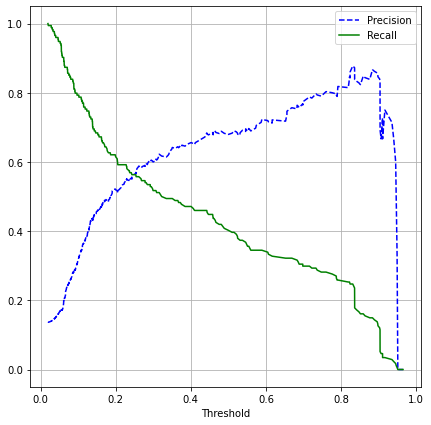

In [103]:
plot_precision_recall(grid_search_svm)

- Plotte die ROC-Curve.

In [ ]:
from sklearn.metrics import roc_curve

- Das Restaurant will ein Modell, welches eine *Precision* von mindestens 80% hat. Welchen Schwellenwert (*Threshold*) würdest du wählen?
- Wie hoch ist Precision und Recall auf dem Testset mit und ohne Berücksichtigung des Schwellenwerts?

In [ ]:
##treshhold 0,82

In [107]:
##grid_search_svm.best_estimator_.predict_proba(X_test_clf)

array([[0.60712798, 0.39287202],
       [0.94365571, 0.05634429],
       [0.94194074, 0.05805926],
       [0.93990958, 0.06009042],
       [0.86598058, 0.13401942],
       [0.95511533, 0.04488467],
       [0.97701148, 0.02298852],
       [0.95406055, 0.04593945],
       [0.87549529, 0.12450471],
       [0.90017889, 0.09982111],
       [0.90501807, 0.09498193],
       [0.94187288, 0.05812712],
       [0.73749044, 0.26250956],
       [0.3250384 , 0.6749616 ],
       [0.94303285, 0.05696715],
       [0.97403917, 0.02596083],
       [0.97633137, 0.02366863],
       [0.83826598, 0.16173402],
       [0.9577373 , 0.0422627 ],
       [0.93380013, 0.06619987],
       [0.93770358, 0.06229642],
       [0.10362895, 0.89637105],
       [0.01749938, 0.98250062],
       [0.94186859, 0.05813141],
       [0.98365287, 0.01634713],
       [0.9418941 , 0.0581059 ],
       [0.96267475, 0.03732525],
       [0.94192567, 0.05807433],
       [0.92940973, 0.07059027],
       [0.9751924 , 0.0248076 ],
       [0.

finale Version